## Import Library

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('seaborn')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Set up DataFrame

In [2]:
df_train = pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')
df_combine = [df_test, df_train]

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_test.shape, df_train.shape

((418, 11), (891, 12))

In [6]:
df = df_train.copy()

In [7]:
df2 = df_test.copy()

In [8]:
df_combine2 = [df,df2]

In [9]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA
#### exploratory data analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####  distribution of categorical features

In [14]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moor, Mrs. (Beila)",male,347082,G6,S
freq,1,577,7,4,644


## First Assumption
###### The person who survived are mostly female and children. People who were helped into a life boat are presumably people with parents, children or spouses or wealthy.

#### Correlating

### These analyses are percentages

In [15]:
df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


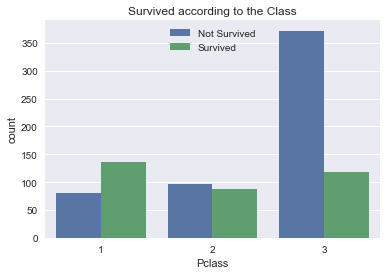

In [16]:
sns.countplot(data = df_train, x='Pclass', hue='Survived')
plt.title('Survived according to the Class')
plt.legend(['Not Survived', 'Survived'],loc='upper center', prop={'size': 10})
plt.show()

In [17]:
df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Survived          0          1
Sex                           
female     9.090909  26.150393
male      52.525253  12.233446


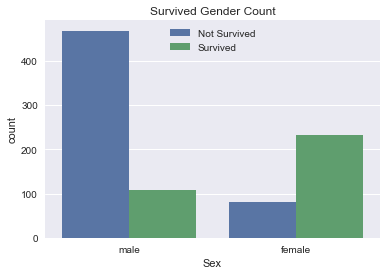

In [18]:
print(pd.crosstab(df_train.Sex, df_train.Survived) / df_train.shape[0]*100)
sns.countplot(data = df_train, hue='Survived', x='Sex')
plt.title('Survived Gender Count')
plt.legend(['Not Survived', 'Survived'],loc='upper center', prop={'size': 10})
plt.show()

In [19]:
df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(
    by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


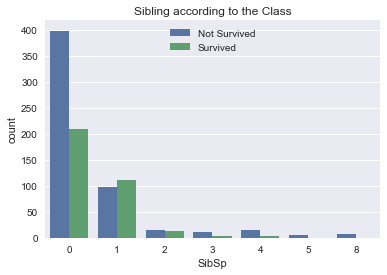

In [20]:
sns.countplot(data = df_train, x='SibSp', hue='Survived')
plt.title('Sibling according to the Class')
plt.legend(['Not Survived', 'Survived'],loc='upper center', prop={'size': 10})
plt.show()

In [21]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(
    by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


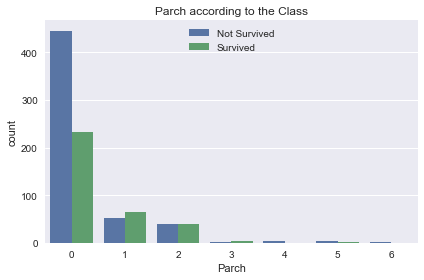

In [22]:
sns.countplot(data = df_train, x='Parch', hue='Survived')
plt.title('Parch according to the Class')
plt.legend(['Not Survived', 'Survived'],loc='upper center', prop={'size': 10})
plt.tight_layout()
plt.show()

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

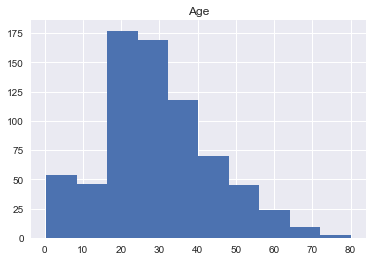

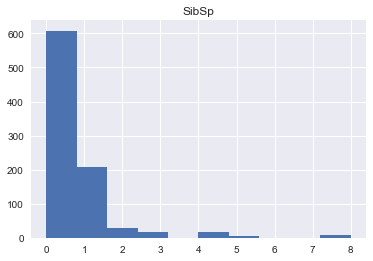

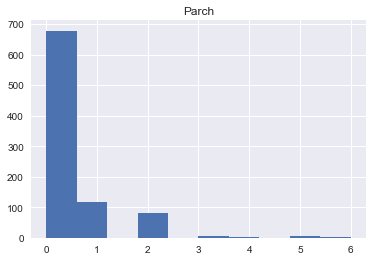

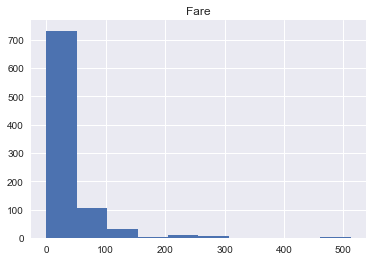

In [25]:
for column in df_num.columns:
    plt.hist(df_num[column])
    plt.title(column)
    plt.show()

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<AxesSubplot:>

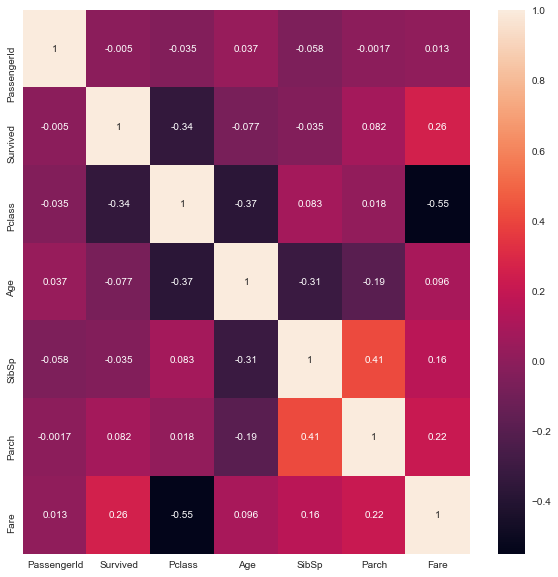

In [26]:
print(df.corr)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<bound method DataFrame.corr of       Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888   NaN      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]>


<AxesSubplot:>

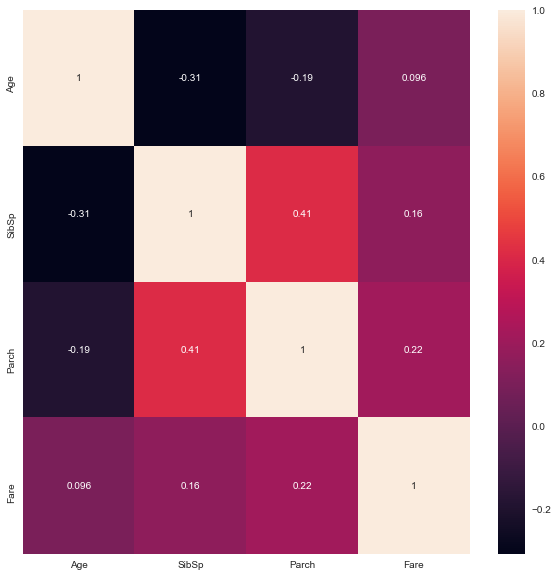

In [27]:
print(df_num.corr)
plt.figure(figsize=(10,10))
sns.heatmap(df_num.corr(),annot = True)

## Compare

In [28]:
pd.pivot_table(df, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


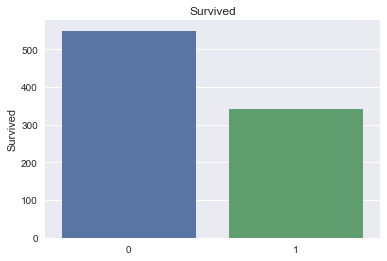

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


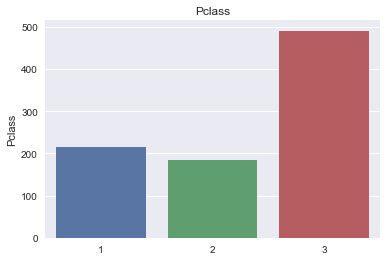

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


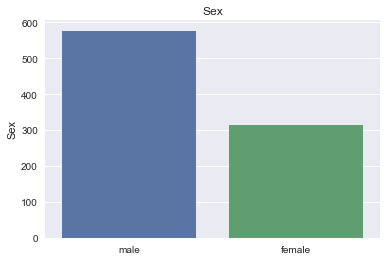

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


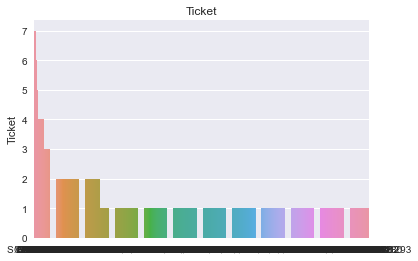

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


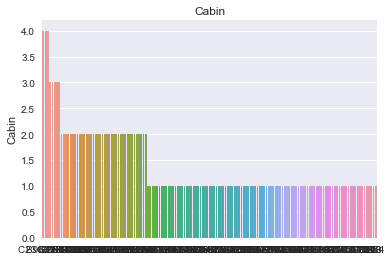

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


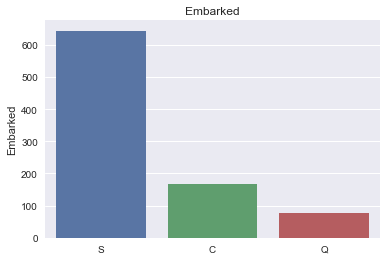

In [29]:
for col in df_cat.columns:
    sns.barplot(df_cat[col].value_counts().index, df_cat[col].value_counts()).set_title(col)
    plt.show()

In [30]:
print(pd.pivot_table(df, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print('-'*23)
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print('-'*23)
print()
print(pd.pivot_table(df, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
-----------------------

Sex       female  male
Survived              
0             81   468
1            233   109
-----------------------

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [31]:
df_train['Title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['Title'] = df_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [32]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [33]:
df_test.shape

(418, 12)

In [34]:
df_train['Title'] = df_train['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'HigherUps')
df_test['Title'] = df_test['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master'], 'HigherUps')


df_train['Title'] = df_train['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')


df_train['Title'] = df_train['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')

df_train['Title'] = df_train['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,HigherUps,0.492063
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651


In [35]:
df_test.shape

(418, 12)

In [36]:
df_train.shape

(891, 13)

In [37]:
df_test.loc[(df_test['Age'] < 20) & (df_test['Title'] == 'Mr')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
35,927,3,"Katavelas, Mr. Vassilios (Catavelas Vassilios"")""",male,18.5,0,0,2682,7.2292,NaN,C,Mr
60,952,3,"Dika, Mr. Mirko",male,17.0,0,0,349232,7.8958,NaN,S,Mr
62,954,3,"Bjorklund, Mr. Ernst Herbert",male,18.0,0,0,347090,7.7500,NaN,S,Mr
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S,Mr
115,1007,3,"Chronopoulos, Mr. Demetrios",male,18.0,1,0,2680,14.4542,NaN,C,Mr
167,1059,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.3750,NaN,S,Mr
187,1079,3,"Davies, Mr. Joseph",male,17.0,2,0,A/4 48873,8.0500,NaN,S,Mr
212,1104,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S,Mr
230,1122,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S,Mr


In [38]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [39]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [40]:
df_test['Age'] = df['Age'].fillna(df['Age'].mean())

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [43]:
df_train['age_class'] = pd.cut(df_train.Age, bins = [0, 2, 5, 18, 60, 100], labels = ["infant", 
                                                                          "toddler", 
                                                                          "child",
                                                                          "adult",
                                                                          "senior_citizen"], include_lowest = True)

In [44]:
df_train.shape

(891, 14)

In [45]:
df_test['age_class'] = pd.cut(df_test.Age, bins = [0, 2, 5, 18, 60, 100], labels = ["infant", 
                                                                          "toddler", 
                                                                          "child",
                                                                          "adult",
                                                                          "senior_citizen"], include_lowest = True)

In [46]:
df_test.shape

(418, 13)

In [47]:
df_train.age_class.value_counts()

adult             730
child              95
infant             24
senior_citizen     22
toddler            20
Name: age_class, dtype: int64

In [48]:
pd.crosstab(df_train.age_class, df.Survived)

Survived,0,1
age_class,,
infant,9,15
toddler,4,16
child,56,39
adult,463,267
senior_citizen,17,5


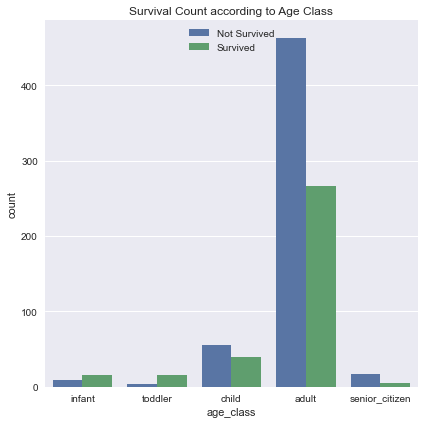

In [49]:
plt.figure(figsize = (6,6))
sns.countplot(data = df_train, x='age_class', hue='Survived')
plt.title('Survival Count according to Age Class')
plt.legend(['Not Survived', 'Survived'],loc='upper center', prop={'size': 10})
plt.tight_layout()
plt.show()

In [50]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult


<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                               

<AxesSubplot:>

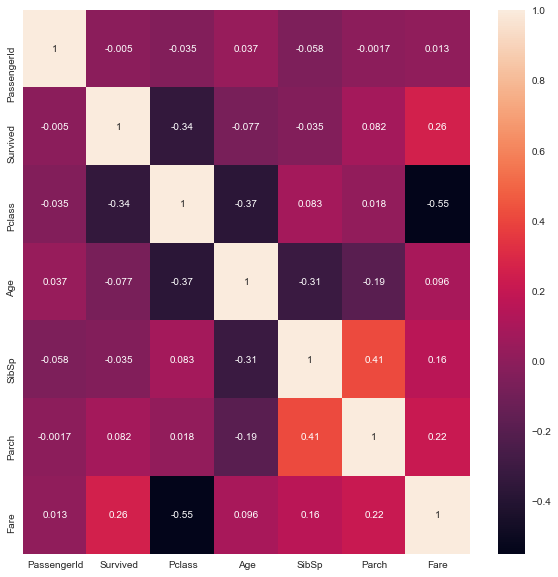

In [51]:
print(df_train.corr)
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)

In [52]:
df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [53]:
df_test['cabin_multiple'] = df_test.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_test['cabin_multiple'].value_counts()

0    327
1     74
2     10
3      4
4      3
Name: cabin_multiple, dtype: int64

In [54]:
pd.pivot_table(df_train, index='Survived', columns ='cabin_multiple', values = "Ticket", aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [55]:
df_train['cabin_dv'] = df.Cabin.apply(lambda x:str(x)[0])
df_test['cabin_dv'] = df.Cabin.apply(lambda x:str(x)[0])

In [56]:
df_test.cabin_dv.value_counts()

n    326
C     32
B     16
D     14
E     11
F      8
A      6
G      4
T      1
Name: cabin_dv, dtype: int64

In [57]:
pd.pivot_table(df_train, index='Survived', columns = 'cabin_dv', values = 'Name', aggfunc='count')

cabin_dv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [58]:
#columns_to_drop = ['PassengerId','Ticket']

#for column in columns_to_drop:
#    df = df.drop(column, axis = 1)

#df.head()

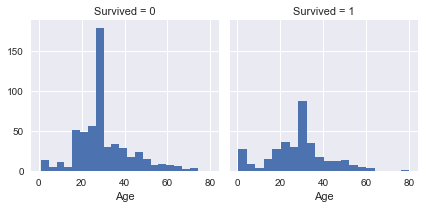

In [59]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [60]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


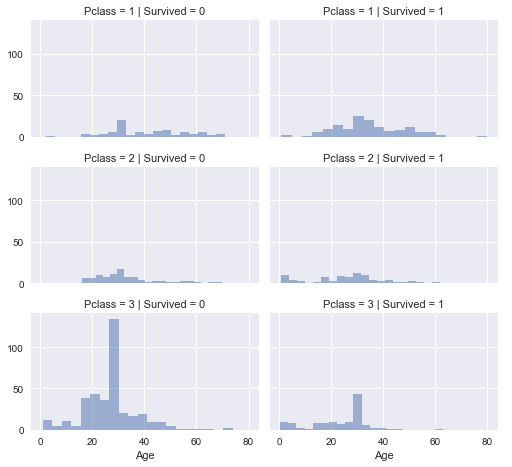

In [61]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [62]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,age_class,cabin_multiple,cabin_dv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,adult,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,adult,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,adult,0,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,adult,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,adult,0,n


In [63]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'age_class',
       'cabin_multiple', 'cabin_dv'],
      dtype='object')

In [64]:
df_test = df_test.drop(['Name','Ticket','Cabin', 'cabin_multiple', 'Age'], axis = 1)

In [65]:
df_train = df_train.drop(['Name','Ticket','Cabin', 'cabin_multiple', 'PassengerId', 'Age'], axis = 1)

## FILL NaN's

In [66]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age_class,cabin_dv
0,0,3,male,1,0,7.2500,S,Mr,adult,n
1,1,1,female,1,0,71.2833,C,Mrs,adult,C
2,1,3,female,0,0,7.9250,S,Miss,adult,n
3,1,1,female,1,0,53.1000,S,Mrs,adult,C
4,0,3,male,0,0,8.0500,S,Mr,adult,n


In [67]:
df_train.isnull().sum()

Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     2
Title        0
age_class    0
cabin_dv     0
dtype: int64

In [68]:
freq_port = df_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [69]:
df_train['Embarked'] = df_train['Embarked'].fillna(freq_port)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [70]:
df_test['Embarked'] = df_test['Embarked'].fillna(freq_port)

In [71]:
df_train.isna().sum()

Survived     0
Pclass       0
Sex          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Title        0
age_class    0
cabin_dv     0
dtype: int64

In [72]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
age_class      0
cabin_dv       0
dtype: int64

In [73]:
df_test['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
age_class      0
cabin_dv       0
dtype: int64

In [74]:
df_train.shape, df_test.shape

((891, 10), (418, 10))

In [75]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Fare         418 non-null    float64 
 6   Embarked     418 non-null    object  
 7   Title        418 non-null    object  
 8   age_class    418 non-null    category
 9   cabin_dv     418 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 30.1+ KB


In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Sex        891 non-null    object  
 3   SibSp      891 non-null    int64   
 4   Parch      891 non-null    int64   
 5   Fare       891 non-null    float64 
 6   Embarked   891 non-null    object  
 7   Title      891 non-null    object  
 8   age_class  891 non-null    category
 9   cabin_dv   891 non-null    object  
dtypes: category(1), float64(1), int64(4), object(4)
memory usage: 63.8+ KB


In [77]:
df_sex = pd.get_dummies(data=df_train['Sex'])
df_sex2 = pd.get_dummies(data=df_test['Sex'])

In [78]:
df_train = pd.concat([df_train, df_sex], axis=1)
df_test = pd.concat([df_test, df_sex2], axis=1)

In [79]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   SibSp        418 non-null    int64   
 4   Parch        418 non-null    int64   
 5   Fare         418 non-null    float64 
 6   Embarked     418 non-null    object  
 7   Title        418 non-null    object  
 8   age_class    418 non-null    category
 9   cabin_dv     418 non-null    object  
 10  female       418 non-null    uint8   
 11  male         418 non-null    uint8   
dtypes: category(1), float64(1), int64(4), object(4), uint8(2)
memory usage: 30.9+ KB


In [80]:
df_cabin = pd.get_dummies(data = df_train['cabin_dv'])
df_cabin2 = pd.get_dummies(data = df_test['cabin_dv'])

In [81]:
df_train = pd.concat([df_train, df_cabin], axis = 1)
df_test = pd.concat([df_test, df_cabin2], axis = 1)

In [82]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age_class,cabin_dv,...,male,A,B,C,D,E,F,G,T,n
0,0,3,male,1,0,7.2500,S,Mr,adult,n,...,1,0,0,0,0,0,0,0,0,1
1,1,1,female,1,0,71.2833,C,Mrs,adult,C,...,0,0,0,1,0,0,0,0,0,0
2,1,3,female,0,0,7.9250,S,Miss,adult,n,...,0,0,0,0,0,0,0,0,0,1
3,1,1,female,1,0,53.1000,S,Mrs,adult,C,...,0,0,0,1,0,0,0,0,0,0
4,0,3,male,0,0,8.0500,S,Mr,adult,n,...,1,0,0,0,0,0,0,0,0,1


In [83]:
df_class = pd.get_dummies(data = df['Pclass'])
df_class.rename(columns= {1: 'first_class',
                            2: 'second_class',
                            3: 'third_class'},
                  inplace=True)
df_class.head(20)

,first_class,second_class,third_class
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [84]:
df_class2 = pd.get_dummies(data = df2['Pclass'])
df_class2.rename(columns= {1: 'first_class',
                            2: 'second_class',
                            3: 'third_class'},
                  inplace=True)

In [85]:
df_train = pd.concat([df_train, df_class], axis = 1)
df_test = pd.concat([df_test, df_class2], axis = 1)

In [86]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'age_class', 'cabin_dv', 'female', 'male', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'T', 'n', 'first_class', 'second_class', 'third_class'],
      dtype='object')

In [87]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Sex           418 non-null    object  
 3   SibSp         418 non-null    int64   
 4   Parch         418 non-null    int64   
 5   Fare          418 non-null    float64 
 6   Embarked      418 non-null    object  
 7   Title         418 non-null    object  
 8   age_class     418 non-null    category
 9   cabin_dv      418 non-null    object  
 10  female        418 non-null    uint8   
 11  male          418 non-null    uint8   
 12  A             418 non-null    uint8   
 13  B             418 non-null    uint8   
 14  C             418 non-null    uint8   
 15  D             418 non-null    uint8   
 16  E             418 non-null    uint8   
 17  F             418 non-null    uint8   
 18  G         

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    object  
 3   SibSp         891 non-null    int64   
 4   Parch         891 non-null    int64   
 5   Fare          891 non-null    float64 
 6   Embarked      891 non-null    object  
 7   Title         891 non-null    object  
 8   age_class     891 non-null    category
 9   cabin_dv      891 non-null    object  
 10  female        891 non-null    uint8   
 11  male          891 non-null    uint8   
 12  A             891 non-null    uint8   
 13  B             891 non-null    uint8   
 14  C             891 non-null    uint8   
 15  D             891 non-null    uint8   
 16  E             891 non-null    uint8   
 17  F             891 non-null    uint8   
 18  G         

In [89]:
df_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age_class,cabin_dv,...,C,D,E,F,G,T,n,first_class,second_class,third_class
0,0,3,male,1,0,7.2500,S,Mr,adult,n,...,0,0,0,0,0,0,1,0,0,1
1,1,1,female,1,0,71.2833,C,Mrs,adult,C,...,1,0,0,0,0,0,0,1,0,0
2,1,3,female,0,0,7.9250,S,Miss,adult,n,...,0,0,0,0,0,0,1,0,0,1
3,1,1,female,1,0,53.1000,S,Mrs,adult,C,...,1,0,0,0,0,0,0,1,0,0
4,0,3,male,0,0,8.0500,S,Mr,adult,n,...,0,0,0,0,0,0,1,0,0,1


In [90]:
df_embark = pd.get_dummies(data = df['Embarked'])
df_embark.rename(columns= {'S': 'southampton',
                            'C': 'cherbourg',
                            'Q': 'queenstown'},
                  inplace=True)

In [91]:
df_embark2 = pd.get_dummies(data = df2['Embarked'])
df_embark2.rename(columns= {'S': 'southampton',
                            'C': 'cherbourg',
                            'Q': 'queenstown'},
                  inplace=True)

In [92]:
df_train = pd.concat([df_train, df_embark], axis = 1)
df_test = pd.concat([df_test, df_embark2], axis = 1)

In [93]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'age_class', 'cabin_dv', 'female', 'male', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'T', 'n', 'first_class', 'second_class', 'third_class',
       'cherbourg', 'queenstown', 'southampton'],
      dtype='object')

In [94]:
df_train = df_train.drop(['Embarked','cabin_dv', 'Sex'], axis = 1)
df_test = df_test.drop(['Embarked','cabin_dv', 'Sex'], axis = 1)

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   SibSp         891 non-null    int64   
 3   Parch         891 non-null    int64   
 4   Fare          891 non-null    float64 
 5   Title         891 non-null    object  
 6   age_class     891 non-null    category
 7   female        891 non-null    uint8   
 8   male          891 non-null    uint8   
 9   A             891 non-null    uint8   
 10  B             891 non-null    uint8   
 11  C             891 non-null    uint8   
 12  D             891 non-null    uint8   
 13  E             891 non-null    uint8   
 14  F             891 non-null    uint8   
 15  G             891 non-null    uint8   
 16  T             891 non-null    uint8   
 17  n             891 non-null    uint8   
 18  first_clas

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   SibSp         418 non-null    int64   
 3   Parch         418 non-null    int64   
 4   Fare          418 non-null    float64 
 5   Title         418 non-null    object  
 6   age_class     418 non-null    category
 7   female        418 non-null    uint8   
 8   male          418 non-null    uint8   
 9   A             418 non-null    uint8   
 10  B             418 non-null    uint8   
 11  C             418 non-null    uint8   
 12  D             418 non-null    uint8   
 13  E             418 non-null    uint8   
 14  F             418 non-null    uint8   
 15  G             418 non-null    uint8   
 16  T             418 non-null    uint8   
 17  n             418 non-null    uint8   
 18  first_clas

In [97]:
df_Title = pd.get_dummies(data=df_train['Title'])
df_Title2 = pd.get_dummies(data=df_test['Title'])

In [98]:
df_train = pd.concat([df_train, df_Title], axis = 1)
df_test = pd.concat([df_test, df_Title2], axis = 1)

In [99]:
df_train = df_train.drop(['Title'], axis = 1)
df_test = df_test.drop(['Title'], axis = 1)

In [100]:
df_AgeClass = pd.get_dummies(data=df_train['age_class'])
df_AgeClass2 = pd.get_dummies(data=df_test['age_class'])

In [101]:
df_train = pd.concat([df_train, df_AgeClass], axis = 1)
df_test = pd.concat([df_test, df_AgeClass2], axis = 1)

In [102]:
df_train = df_train.drop(['age_class','Pclass'], axis = 1)
df_test = df_test.drop(['age_class','Pclass'], axis = 1)

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   SibSp           891 non-null    int64  
 2   Parch           891 non-null    int64  
 3   Fare            891 non-null    float64
 4   female          891 non-null    uint8  
 5   male            891 non-null    uint8  
 6   A               891 non-null    uint8  
 7   B               891 non-null    uint8  
 8   C               891 non-null    uint8  
 9   D               891 non-null    uint8  
 10  E               891 non-null    uint8  
 11  F               891 non-null    uint8  
 12  G               891 non-null    uint8  
 13  T               891 non-null    uint8  
 14  n               891 non-null    uint8  
 15  first_class     891 non-null    uint8  
 16  second_class    891 non-null    uint8  
 17  third_class     891 non-null    uin

In [104]:
#df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
#df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [105]:
for dataset in df_combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

df_combine = [df_train, df_test]

In [106]:
df_test.shape, df_train.shape

((418, 30), (891, 30))

In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   SibSp           891 non-null    int64  
 2   Parch           891 non-null    int64  
 3   Fare            891 non-null    float64
 4   female          891 non-null    uint8  
 5   male            891 non-null    uint8  
 6   A               891 non-null    uint8  
 7   B               891 non-null    uint8  
 8   C               891 non-null    uint8  
 9   D               891 non-null    uint8  
 10  E               891 non-null    uint8  
 11  F               891 non-null    uint8  
 12  G               891 non-null    uint8  
 13  T               891 non-null    uint8  
 14  n               891 non-null    uint8  
 15  first_class     891 non-null    uint8  
 16  second_class    891 non-null    uint8  
 17  third_class     891 non-null    uin

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split

In [109]:
X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']
X_test_data = df_test.drop('PassengerId', axis = 1).copy()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.32740258 0.36518531 0.41058611 0.33568684 0.50535331]
Average 5-Fold CV Score: 0.38884282813880167


In [112]:
param_grid = {
    'n_estimators':[200,150,100,50],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6]
}

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Model_rf = RandomForestClassifier()
grid = GridSearchCV(estimator=Model_rf, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)
Model_rf = grid.best_estimator_

In [114]:
y_pred_train = Model_rf.predict(X_test)
training_data_accuracy_rf = accuracy_score(y_test, y_pred_train)

print("The accuracy of RandomForestC Model is", (training_data_accuracy_rf*100), '%')

The accuracy of RandomForestC Model is 79.24263674614306 %


In [115]:
rf = RandomForestClassifier(criterion='entropy', max_depth=6)

In [116]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred, y_test))
y_train_pre = rf.predict(X_train)
print(accuracy_score(y_train_pre, y_train))

0.7952314165497896
0.9325842696629213


In [117]:
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.88888889 0.77777778 0.77777778 0.66666667 0.88888889 0.77777778
 1.         0.88888889 0.82352941 0.94117647]
Mean: 0.8431372549019607
Standard Deviation: 0.0921081779343938


In [118]:
print("Accuracy_score", accuracy_score(y_train_pre, y_train))
print("Mean:", scores.mean())
print("Variation:", scores.var())

Accuracy_score 0.9325842696629213
Mean: 0.8431372549019607
Variation: 0.008483916442393949


In [119]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})

<AxesSubplot:xlabel='feature'>

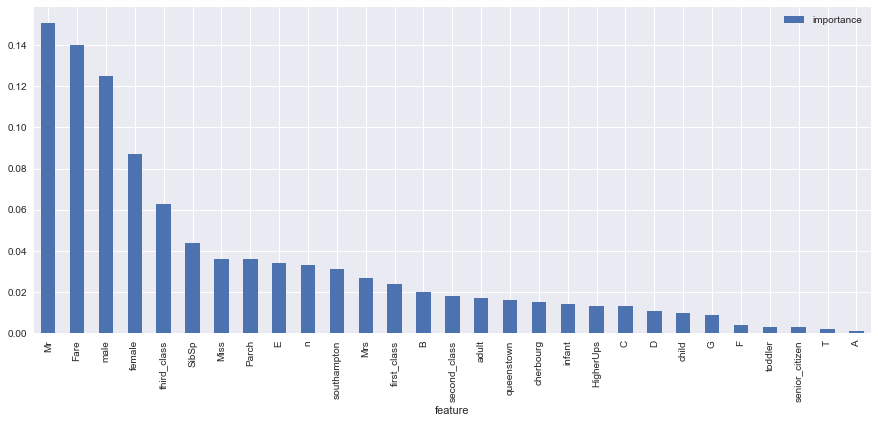

In [120]:
importances1 = importances.sort_values('importance',ascending=False).set_index('feature')
importances1.plot(kind='bar',figsize=(15,6))

In [126]:
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[372  64]
 [ 79 198]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       436
           1       0.76      0.71      0.73       277

    accuracy                           0.80       713
   macro avg       0.79      0.78      0.79       713
weighted avg       0.80      0.80      0.80       713



/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


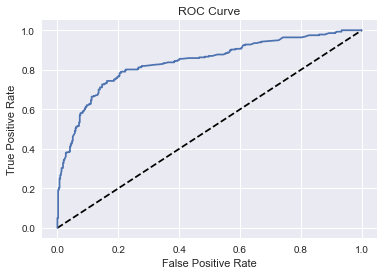

In [127]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr, label = 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [128]:
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv = 5, scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8393501805054151


/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

AUC scores computed using 5-fold cross-validation: [0.84980237 0.83763369 0.88308824 0.84846257 0.89968089]


/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8215491808423827


/Users/jacquesdeclercq/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
y_preds_test = rf.predict(X_test_data)

In [138]:
Titanic_submission = pd.DataFrame({'Passengerid':df_test['PassengerId'],
                                     'Survived':y_preds_test})

In [139]:
Titanic_submission.head()

,Passengerid,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [140]:
Titanic_submission.shape

(418, 2)

In [141]:
Titanic_submission.to_csv('Titanic_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
